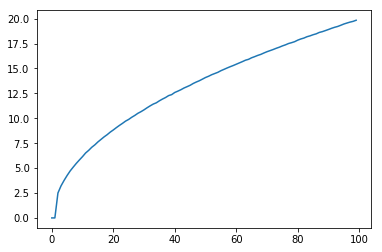

In [133]:
import numpy as np
import matplotlib.pyplot as plt
size1 = 2
size2 = 100
sigmasq = 2
l = 10000
g = np.zeros(size2)

for size1 in range(2, size2):
    d = np.zeros(l)
    cov =  sigmasq*np.eye(size1)
    mu1 = np.zeros(size1)
    mu2 = np.zeros(size1)
    a = np.random.multivariate_normal(mu1, cov, size = l)
    b = np.random.multivariate_normal(mu2, cov, size = l)

    for i in range(0, l):
        d[i] = np.sqrt(np.dot((a[i] - b[i]),(a[i] - b[i])))

    g[size1] = np.mean(d)

plt.plot(range(0, size2), g)
plt.show()


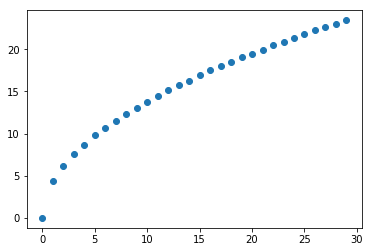

In [134]:
size1 = 10
size3 = 30
g = np.zeros(size3)
for co in range(1, size3):
    d = np.zeros(l)
    cov =  co*np.eye(size1)
    mu1 = np.zeros(size1)
    mu2 = np.zeros(size1)
    a = np.random.multivariate_normal(mu1, cov, size = l)
    b = np.random.multivariate_normal(mu2, cov, size = l)

    for i in range(0, l):
        d[i] = np.sqrt(np.dot((a[i] - b[i]),(a[i] - b[i])))

    g[co] = np.mean(d)

plt.scatter(range(0, size3), g)
plt.show()

In [186]:
size = 10
co = 40
l = 1000
d = np.zeros(l)
d1 = np.zeros(l)
cov =  co*np.eye(size)
mu1 = np.ones(size)
mu2 = np.ones(size)
a = np.random.multivariate_normal(mu1, cov, size = l)
b = np.random.multivariate_normal(mu2, cov, size = l)
for i in range(0, l):
    d1[i] = np.sqrt(np.dot((b[i] ),(b[i] )))
for i in range(0, l):
    d[i] = np.sqrt(np.dot((a[i] - b[i]),(a[i] - b[i])))

print np.mean(d)
print np.mean(d1)

27.7071034217991
19.831760438595445


In [171]:
np.sqrt(760)

27.568097504180443

In [17]:
import csv
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt

## Calculating the function values as W . phi(X

def f(X, weights):
	phiX = phi(X, len(weights))
	return np.matmul(phiX, weights)

def phi(X, num_phis):
	
	phiX = np.zeros((X.shape[0], num_phis))
	for i in range(X.shape[0]):
		phi = [phii(i, j, X) for j in range(num_phis)]
		phiX[i,:] = (np.array(phi)).reshape(1,-1)
	
	return phiX

def phii(i,j, X):
	if j==0:
		return X[i]
	elif j==1:
		return 1

def plot_line(mean, cov, pts_to_plt):
	for i in range(0, 1):
		sample = np.random.multivariate_normal([mean[0,0], mean[1,0]], cov, 1)
		print "Sample : {}".format(sample)
        sample = np.array(sample).reshape(-1,1)
		plt.plot(pts_to_plt, f(pts_to_plt, sample))


epsilon = 0.2
orig_weights = np.array([0.5, -0.3]).reshape(-1,1)
X = np.random.uniform(-1, 1, 100)

print posterior_mean
print f(np.array(2.0).reshape(1,-1), posterior_mean)

IndentationError: unexpected indent (<ipython-input-17-3c7b0a22ea5e>, line 33)

Sample : [[-0.67701339 -0.87700662]]
Sample : [[ 0.1771032 -0.4108961]]
Sample : [[-0.56186147 -0.84608527]]
Sample : [[ 0.32618273 -0.30038059]]
Sample : [[ 0.90844889 -0.13202901]]


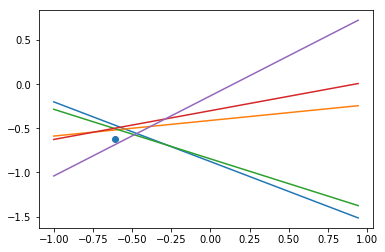

Sample : [[ 0.30667767 -0.14171998]]
Sample : [[ 0.50198719 -0.39550564]]
Sample : [[ 0.47231868 -0.41066678]]
Sample : [[ 0.60832567 -0.29606482]]
Sample : [[ 0.63949131 -0.23543943]]


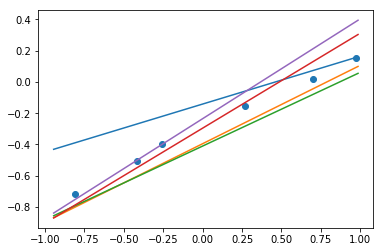

Sample : [[ 0.52115325 -0.35735305]]
Sample : [[ 0.43393363 -0.34148571]]
Sample : [[ 0.4175933  -0.13606522]]
Sample : [[ 0.41832343 -0.32581512]]
Sample : [[ 0.63073863 -0.33603348]]


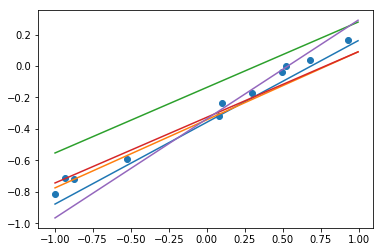

Sample : [[ 0.45399373 -0.28690653]]
Sample : [[ 0.45287408 -0.21265363]]
Sample : [[ 0.42287843 -0.33327625]]
Sample : [[ 0.51857271 -0.27607286]]
Sample : [[ 0.40454751 -0.34570029]]


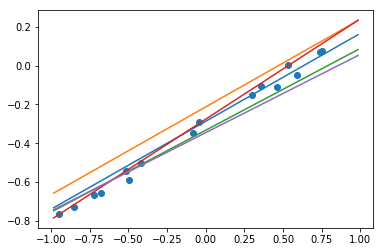

In [24]:
for num_points in range(1, 20, 5):
    epsilon = 0.02
    orig_weights = np.array([0.5, -0.3]).reshape(-1,1)
    X = np.random.uniform(-1, 1, 100)


    Xn = X[0:num_points]
    Xn = (np.sort(Xn)).reshape(-1,1)
    delta = [np.random.normal(0,epsilon,1) for i in range(len(Xn))]

    t = f(Xn, orig_weights)
    y = [t[i]+delta[i][0] for i in range(t.shape[0])]

    weights_len = 2
    plt.scatter(np.sort(Xn), y)
    #plt.show()

    prior_mean = 0
    alpha = 2.0

    noise_mean = 0
    beta = 25
    Xn = Xn.reshape((-1,1))

    des_mat = phi(Xn, weights_len)	


    posterior_cov_inv = alpha*np.eye(weights_len) + beta*np.matmul(des_mat.T, des_mat)
    posterior_cov = np.linalg.inv(posterior_cov_inv)
    posterior_mean = beta * np.matmul(posterior_cov, np.matmul(des_mat.T, t))

    #print posterior_mean
    #print posterior_cov

    pts_to_plt = np.sort(X)
    mean = posterior_mean
    cov =  posterior_cov
    for i in range(0,5):
        sample = np.random.multivariate_normal([mean[0,0], mean[1,0]], cov, 1)
        print "Sample : {}".format(sample)
        sample = np.array(sample).reshape(-1,1)
        plt.plot(pts_to_plt, f(pts_to_plt, sample))
    #plot_line(posterior_mean, posterior_cov, pts_to_plt)
    plt.show()
